<a href="https://colab.research.google.com/github/Tangent007/ML-Projects/blob/master/Facial%20Expression%20Recognition%20with%20Keras/Facial_Expression_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Facial Expression Recognition with Keras</h2>

In [1]:
!git clone "https://github.com/Tangent007/ML-Projects.git"

Cloning into 'ML-Projects'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 34148 (delta 0), reused 0 (delta 0), pack-reused 34144
Receiving objects: 100% (34148/34148), 64.27 MiB | 11.04 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Checking out files: 100% (35908/35908), done.


In [0]:
rm -r /content/ML-Projects

In [8]:
!pip install livelossplot==0.5.0

  Using cached https://files.pythonhosted.org/packages/7c/e4/a7884b57113dfe84d3565418820feae7a20964438beb1088b2b08820ad94/livelossplot-0.5.0-py3-none-any.whl
  Found existing installation: livelossplot 0.4.2
    Uninstalling livelossplot-0.4.2:
      Successfully uninstalled livelossplot-0.4.2


### Task 1: Import Libraries

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.2.0-rc3


### Task 2: Plot Sample Image

In [0]:
from fer import plot_example_images

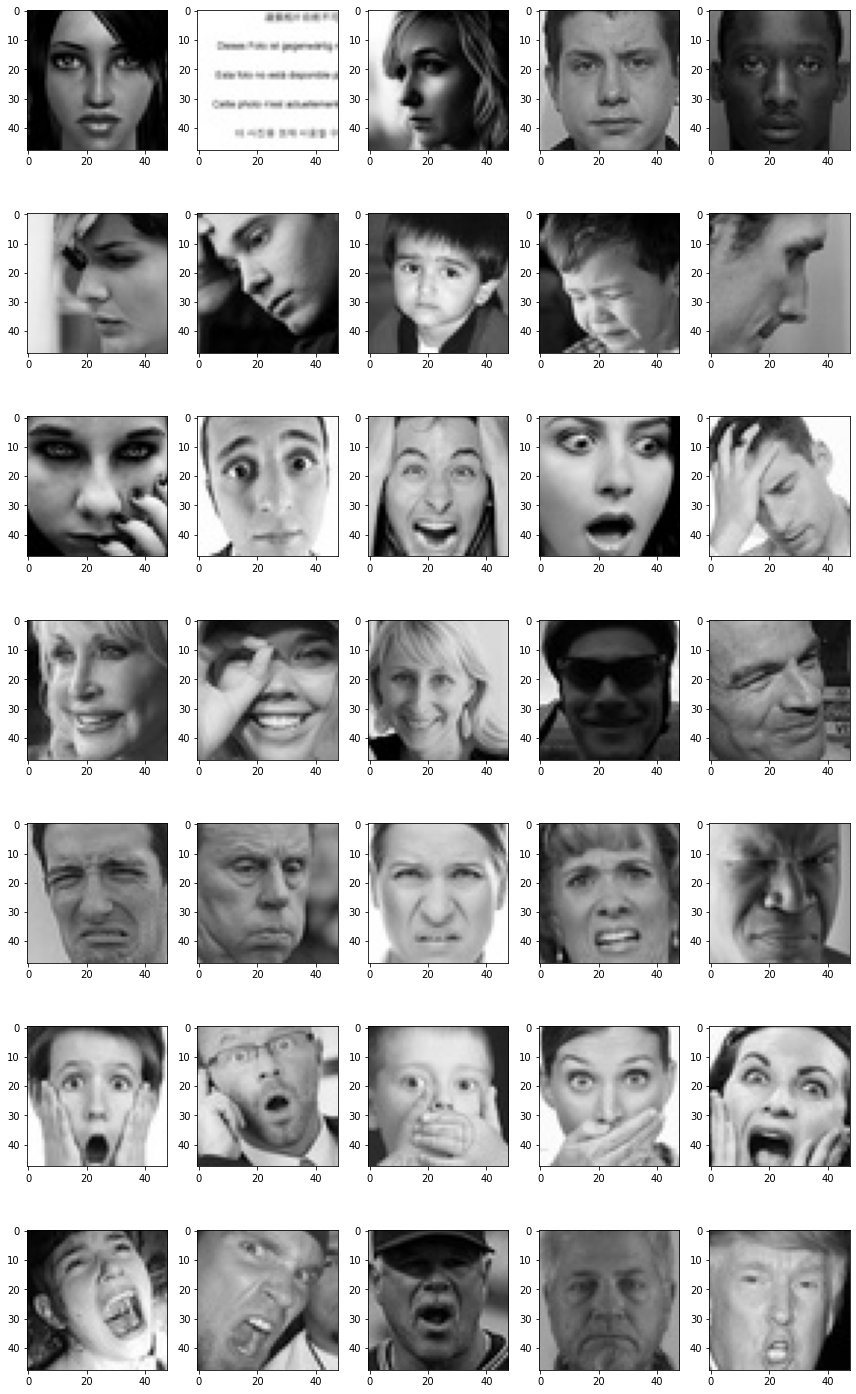

In [0]:
plot_example_images(plt).show()

In [0]:
for expression in os.listdir("train/"):
  print(str(len(os.listdir("train/"+ expression)))+ " "+expression+ " images")

4965 neutral images
4830 sad images
4097 fear images
7215 happy images
436 disgust images
3171 surprise images
3995 angry images


### Task 3: Generate Training and Validation Batches

In [2]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode='grayscale',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode='grayscale',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Task 4: Create CNN Model

![](model.png)
Inspired by Goodfellow, I.J., et.al. (2013). Challenged in representation learning: A report of three machine learning contests. *Neural Networks*, 64, 59-63. [doi:10.1016/j.neunet.2014.09.005](https://arxiv.org/pdf/1307.0414.pdf)

In [3]:
model = Sequential()

# 1 conv
model.add(Conv2D(64,(3,3),padding='same',input_shape=(img_size,img_size,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 conv
model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3 conv
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 4 conv
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt= Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

### Task 6: Train and Evaluate Model

In [0]:
from livelossplot import PlotLossesKeras

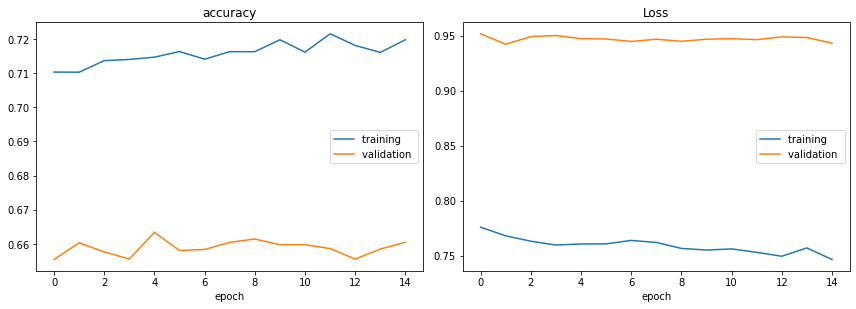

accuracy
	training         	 (min:    0.346, max:    0.721, cur:    0.720)
	validation       	 (min:    0.432, max:    0.663, cur:    0.660)
Loss
	training         	 (min:    0.747, max:    1.698, cur:    0.747)
	validation       	 (min:    0.942, max:    1.494, cur:    0.943)

Epoch 00015: saving model to model_weights.h5
448/448 [==============================] - 29s 64ms/step - loss: 0.7466 - accuracy: 0.7197 - val_loss: 0.9433 - val_accuracy: 0.6604 - lr: 1.0000e-05


In [17]:
epochs= 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001, model='auto')

callbacks= [PlotLossesCallback(), checkpoint, reduce_lr]

history= model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[PlotLossesKerasTF(), checkpoint, reduce_lr]
)

### Task 7: Represent Model as JSON String

In [0]:
model_json = model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)